In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def scan_other(comma_string):
    x = comma_string.split(",")
    return "Other" in x or "Other:" in x

In [3]:
def wants_linked_content(response_string):
    return response_string == "I prefer posts with linked content"

In [4]:
def like_dislike_to_int(string):
    if string == "Dislike":
        return -1
    if string == "Like":
        return 1
    if string == "Neutral":
        return 0

In [5]:
def agreement_to_int(string):
    if string == "strongly disgaree":
        return -2
    if string == "disagree":
        return -1
    if string == "neutral":
        return 0
    if string == "agree":
        return 1
    if string == "strongly agree":
        return 2

In [6]:
df_raw = pd.read_csv('./test4.csv')

In [7]:
df_raw = df_raw.drop([0, 1])

In [8]:
incomplete_rows = df_raw[(df_raw["Status"] == "Survey Preview")|(df_raw["Progress"] != "100")].index
df_raw = df_raw.drop(incomplete_rows)
df_raw = df_raw.fillna("")

In [9]:
df = pd.DataFrame()

df["grade"] = df_raw["Q5"]
df["ethnicity/race"] = df_raw["Q6"]
df["gender"] = df_raw["Q8"]
df["state"] = df_raw["Q9"]
df["school_type"] = df_raw["Q10"]
df["ec_interest"] = df_raw["Q11"]
df["ec_search"] = df_raw["Q12"]
df["ec_involvement"] = df_raw["Q13"]
df["sm"]= df_raw["Q15"]
df["sm_most_used_1"] = df_raw["Q16"]
df["sm_impression_1"] = df_raw["Q17"]
df["sm_most_used_2"] = df_raw["Q18"]
df["sm_impression_2"] = df_raw["Q19"]
df["wants_linked_content"] = df_raw["Q20"].apply(wants_linked_content)
df["linked_content"] = df_raw["Q21"]

df["ci"] = df_raw["CompetitorImage"]
df["ci_heatmap_1"] = df_raw["Q26_1"]
df["ci_heatmap_2"] = df_raw["Q26_2"]
df["ci_heatmap_3"] = df_raw["Q26_3"]
df["ci_heatmap_4"] = df_raw["Q26_4"]
df["ci_heatmap_5"] = df_raw["Q26_5"]
df["ci_heatmap_1_score"] = pd.Series(dtype = "int64")
df["ci_heatmap_2_score"] = pd.Series(dtype = "int64")
df["ci_heatmap_3_score"] = pd.Series(dtype = "int64")
df["ci_heatmap_4_score"] = pd.Series(dtype = "int64")
df["ci_heatmap_5_score"] = pd.Series(dtype = "int64")
df["ci_trustworthy"] = df_raw["Q32_1"]
df["ci_clear"] = df_raw["Q32_2"]
df["ci_attractive"] = df_raw["Q32_3"]
df["ci_informative"] = df_raw["Q32_4"]
df["ci_trustworthy_score"] = pd.Series(dtype = "int64")
df["ci_clear_score"] = pd.Series(dtype = "int64")
df["ci_attractive_score"] = pd.Series(dtype = "int64")
df["ci_informative_score"] = pd.Series(dtype = "int64")
df["ci_feedback"] = df_raw["Q29"]


df["si"] = df_raw["SpotivityImage"]
df["si_heatmap_1"] = df_raw["Q37_1"]
df["si_heatmap_2"] = df_raw["Q37_2"]
df["si_heatmap_3"] = df_raw["Q37_3"]
df["si_heatmap_4"] = df_raw["Q37_4"]
df["si_heatmap_5"] = df_raw["Q37_5"]
df["si_heatmap_6"] = df_raw["Q37_6"]
df["si_heatmap_1_score"] = pd.Series(dtype = "int64")
df["si_heatmap_2_score"] = pd.Series(dtype = "int64")
df["si_heatmap_3_score"] = pd.Series(dtype = "int64")
df["si_heatmap_4_score"] = pd.Series(dtype = "int64")
df["si_heatmap_5_score"] = pd.Series(dtype = "int64")
df["si_heatmap_6_score"] = pd.Series(dtype = "int64")
df["si_trustworthy"] = df_raw["Q41_1"]
df["si_clear"] = df_raw["Q41_2"]
df["si_attractive"] = df_raw["Q41_3"]
df["si_informative"] = df_raw["Q41_4"]
df["si_feedback"] = df_raw["Q38"]
df["si_trustworthy_score"] = pd.Series(dtype = "int64")
df["si_clear_score"] = pd.Series(dtype = "int64")
df["si_attractive_score"] = pd.Series(dtype = "int64")
df["si_informative_score"] = pd.Series(dtype = "int64")

df["additional_feedback"] = df_raw["Q45"]
df["email_address"] = df_raw["Q46"]
df["email_referral"] = df_raw["Q47"]


df.loc[df["grade"] == "Other", "grade"] = df_raw[df_raw["Q5"] == "Other"]["Q5_8_TEXT"]
df.loc[df["ethnicity/race"] == "None of these", "ethnicity/race"] = df_raw[df_raw["Q6"] == "None of these"]["Q7"]
df.loc[df["ethnicity/race"] == "Yes", "ethnicity/race"] = "Spanish/Hispanic/Latino"
df.loc[df["school_type"] == "Other", "school_type"] = df_raw[df_raw["Q10"] == "Other"]["Q10_5_TEXT"]
df.loc[df["ec_interest"].apply(scan_other), "ec_interest"] = df_raw.loc[df_raw["Q11"].apply(scan_other), "Q11"] + "," + df_raw[df_raw["Q11"].apply(scan_other)]["Q11_11_TEXT"].astype(str)
df.loc[df["ec_search"].apply(scan_other), "ec_search"] = df_raw.loc[df_raw["Q12"].apply(scan_other), "Q12"] + "," + df_raw[df_raw["Q12"].apply(scan_other)]["Q12_8_TEXT"].astype(str)
df.loc[df["sm"].apply(scan_other), "sm"] = df_raw.loc[df_raw["Q15"].apply(scan_other), "Q15"] + "," + df_raw[df_raw["Q15"].apply(scan_other)]["Q15_12_TEXT"].astype(str)
df.loc[df["sm_most_used_1"].apply(scan_other), "sm_most_used_1"] = df_raw.loc[df_raw["Q16"].apply(scan_other), "Q16"] + "," + df_raw[df_raw["Q16"].apply(scan_other)]["Q16_6_TEXT"].astype(str)
df.loc[df["sm_most_used_2"].apply(scan_other), "sm_most_used_2"] = df_raw.loc[df_raw["Q18"].apply(scan_other), "Q18"] + "," + df_raw[df_raw["Q18"].apply(scan_other)]["Q18_6_TEXT"].astype(str)


df.loc[df["ci"] == "2", "ci_trustworthy"] = df_raw[df_raw["CompetitorImage"] == "2"]["Q33_1"]
df.loc[df["ci"] == "2", "ci_clear"] = df_raw[df_raw["CompetitorImage"] == "2"]["Q33_2"]
df.loc[df["ci"] == "2", "ci_attractive"] = df_raw[df_raw["CompetitorImage"] == "2"]["Q33_3"]
df.loc[df["ci"] == "2", "ci_informative"] = df_raw[df_raw["CompetitorImage"] == "2"]["Q33_4"]
df.loc[df["ci"] == "2", "ci_feedback"] = df_raw[df_raw["CompetitorImage"] == "2"]["Q30"]
df.loc[df["ci"] == "2", "ci_heatmap_1"] = df_raw[df_raw["CompetitorImage"] == "2"]["Q27_1"]
df.loc[df["ci"] == "2", "ci_heatmap_2"] = df_raw[df_raw["CompetitorImage"] == "2"]["Q27_2"]
df.loc[df["ci"] == "2", "ci_heatmap_3"] = df_raw[df_raw["CompetitorImage"] == "2"]["Q27_3"]
df.loc[df["ci"] == "2", "ci_heatmap_4"] = df_raw[df_raw["CompetitorImage"] == "2"]["Q27_4"]
df.loc[df["ci"] == "2", "ci_heatmap_5"] = df_raw[df_raw["CompetitorImage"] == "2"]["Q27_5"]

df.loc[df["ci"] == "3", "ci_trustworthy"] = df_raw[df_raw["CompetitorImage"] == "3"]["Q34_1"]
df.loc[df["ci"] == "3", "ci_clear"] = df_raw[df_raw["CompetitorImage"] == "3"]["Q34_2"]
df.loc[df["ci"] == "3", "ci_attractive"] = df_raw[df_raw["CompetitorImage"] == "3"]["Q34_3"]
df.loc[df["ci"] == "3", "ci_informative"] = df_raw[df_raw["CompetitorImage"] == "3"]["Q34_4"]
df.loc[df["ci"] == "3", "ci_feedback"] = df_raw[df_raw["CompetitorImage"] == "3"]["Q31"]
df.loc[df["ci"] == "3", "ci_heatmap_1"] = df_raw[df_raw["CompetitorImage"] == "3"]["Q28_1"]
df.loc[df["ci"] == "3", "ci_heatmap_2"] = df_raw[df_raw["CompetitorImage"] == "3"]["Q28_2"]
df.loc[df["ci"] == "3", "ci_heatmap_3"] = df_raw[df_raw["CompetitorImage"] == "3"]["Q28_3"]
df.loc[df["ci"] == "3", "ci_heatmap_4"] = df_raw[df_raw["CompetitorImage"] == "3"]["Q28_4"]
df.loc[df["ci"] == "3", "ci_heatmap_5"] = df_raw[df_raw["CompetitorImage"] == "3"]["Q28_5"]

df.loc[df["si"] == "1", "si_heatmap_1"] = df_raw[df_raw["SpotivityImage"] == "1"]["Q35_1"]
df.loc[df["si"] == "1", "si_heatmap_2"] = df_raw[df_raw["SpotivityImage"] == "1"]["Q35_2"]
df.loc[df["si"] == "1", "si_heatmap_3"] = df_raw[df_raw["SpotivityImage"] == "1"]["Q35_3"]

df.loc[df["si"] == "2", "si_trustworthy"] = df_raw[df_raw["SpotivityImage"] == "2"]["Q42_1"]
df.loc[df["si"] == "2", "si_clear"] = df_raw[df_raw["SpotivityImage"] == "2"]["Q42_2"]
df.loc[df["si"] == "2", "si_attractive"] = df_raw[df_raw["SpotivityImage"] == "2"]["Q42_3"]
df.loc[df["si"] == "2", "si_informative"] = df_raw[df_raw["SpotivityImage"] == "2"]["Q42_4"]
df.loc[df["si"] == "2", "si_feedback"] = df_raw[df_raw["SpotivityImage"] == "2"]["Q39"]
df.loc[df["si"] == "2", "si_heatmap_1"] = df_raw[df_raw["SpotivityImage"] == "2"]["Q36_1"]
df.loc[df["si"] == "2", "si_heatmap_2"] = df_raw[df_raw["SpotivityImage"] == "2"]["Q36_2"]
df.loc[df["si"] == "2", "si_heatmap_3"] = df_raw[df_raw["SpotivityImage"] == "2"]["Q36_3"]
df.loc[df["si"] == "2", "si_heatmap_4"] = df_raw[df_raw["SpotivityImage"] == "2"]["Q36_4"]

df.loc[df["si"] == "3", "si_trustworthy"] = df_raw[df_raw["SpotivityImage"] == "3"]["Q43_1"]
df.loc[df["si"] == "3", "si_clear"] = df_raw[df_raw["SpotivityImage"] == "3"]["Q43_2"]
df.loc[df["si"] == "3", "si_attractive"] = df_raw[df_raw["SpotivityImage"] == "3"]["Q43_3"]
df.loc[df["si"] == "3", "si_informative"] = df_raw[df_raw["SpotivityImage"] == "3"]["Q43_4"]
df.loc[df["si"] == "3", "si_feedback"] = df_raw[df_raw["SpotivityImage"] == "3"]["Q40"]

df["ci_heatmap_1_score"] = df["ci_heatmap_1"].apply(like_dislike_to_int)
df["ci_heatmap_2_score"] = df["ci_heatmap_2"].apply(like_dislike_to_int)
df["ci_heatmap_3_score"] = df["ci_heatmap_3"].apply(like_dislike_to_int)
df["ci_heatmap_4_score"] = df["ci_heatmap_4"].apply(like_dislike_to_int)
df["ci_heatmap_5_score"] = df["ci_heatmap_5"].apply(like_dislike_to_int)
df["ci_clear_score"] = df["ci_clear"].apply(agreement_to_int)
df["ci_trustworthy_score"] = df["ci_trustworthy"].apply(agreement_to_int)
df["ci_attractive_score"] = df["ci_attractive"].apply(agreement_to_int)
df["ci_informative_score"] = df["ci_informative"].apply(agreement_to_int)

df["si_heatmap_1_score"] = df["si_heatmap_1"].apply(like_dislike_to_int)
df["si_heatmap_2_score"] = df["si_heatmap_2"].apply(like_dislike_to_int)
df["si_heatmap_3_score"] = df["si_heatmap_3"].apply(like_dislike_to_int)
df["si_heatmap_4_score"] = df["si_heatmap_4"].apply(like_dislike_to_int)
df["si_heatmap_5_score"] = df["si_heatmap_5"].apply(like_dislike_to_int)
df["si_heatmap_6_score"] = df["si_heatmap_6"].apply(like_dislike_to_int)
df["si_clear_score"] = df["si_clear"].apply(agreement_to_int)
df["si_trustworthy_score"] = df["si_trustworthy"].apply(agreement_to_int)
df["si_attractive_score"] = df["si_attractive"].apply(agreement_to_int)
df["si_informative_score"] = df["si_informative"].apply(agreement_to_int)

df.head()

,grade,ethnicity/race,gender,state,school_type,ec_interest,ec_search,ec_involvement,sm,sm_most_used_1,...,si_attractive,si_informative,si_feedback,si_trustworthy_score,si_clear_score,si_attractive_score,si_informative_score,additional_feedback,email_address,email_referral
10,Grade 12,White,Female,Massachusetts,Public,"Internship,Jobs,Tutoring,Wellness,Volunteering...","Social media,School,Friends and family,Google ...",7,"Instagram,Facebook,TikTok,Youtube,Snapchat",TikTok,...,agree,neutral,It’s very clear and I like the graphics and co...,1.0,2.0,1.0,0.0,,ajwojcik@hillers.org,alexwojcik15@gmail.com
11,Grade 12,Asian,Male,New York,Public,"Internship,Jobs,STEM,Remote,Arts","Social media,School,Google search",8,"Instagram,Twitter,TikTok,Youtube,LinkedIn,Othe...",Instagram,...,agree,agree,It's bland. I don't like the picture. Could us...,0.0,1.0,1.0,1.0,"Second design is much cleaner and sharper, mor...",jjkk2002@me.com,nadine@tygabox.com
12,Grade 12,Asian,Male,Florida,Private,"Internship,STEM,Volunteering,Other,Policy Debate","School,Friends and family,Google search",3,"Instagram,Facebook,Twitter,Youtube,LinkedIn,Sn...",Facebook,...,agree,neutral,I think the advertisement should make it clear...,1.0,2.0,1.0,0.0,I have none.,bskyb99@gmail.com,
13,Grade 9,Asian,Female,Maryland,Public,"Internship,Jobs,STEM,Remote,Volunteering,Arts","Social media,School,Community announcements (N...",7,"Instagram,TikTok,Youtube,Snapchat,Other:,Reddit",TikTok,...,agree,disagree,"It highlights the wrong things, the name of th...",1.0,-1.0,1.0,-1.0,"The more visually pleasing the content is, the...",chshreeya@gmail.com,
14,Grade 10,Spanish/Hispanic/Latino,Female,Florida,Private,"Sports,Arts","Social media,School,Friends and family",7,"Instagram,Twitter,Youtube,Snapchat",Snapchat,...,agree,strongly disagree,"I really like the image they chose however , I...",0.0,NaN,1.0,NaN,,,Mancininicholas20@gmail.com


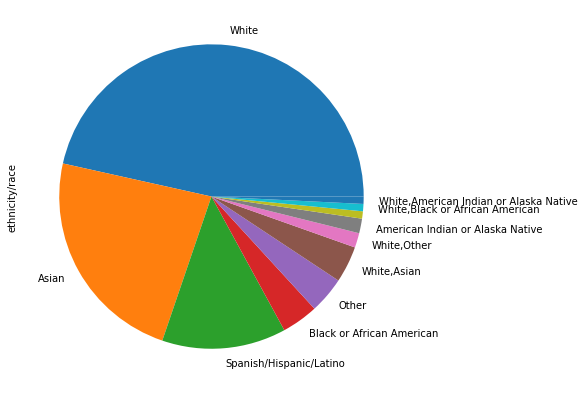

In [10]:
df['ethnicity/race'].value_counts().plot(kind='pie', figsize=(7,7));

In [11]:
df['ethnicity/race'].value_counts()

White                                     60
Asian                                     30
Spanish/Hispanic/Latino                   17
Black or African American                  5
Other                                      5
White,Asian                                5
White,Other                                2
American Indian or Alaska Native           2
                                           1
White,Black or African American            1
White,American Indian or Alaska Native     1
Name: ethnicity/race, dtype: int64

<AxesSubplot:ylabel='gender'>

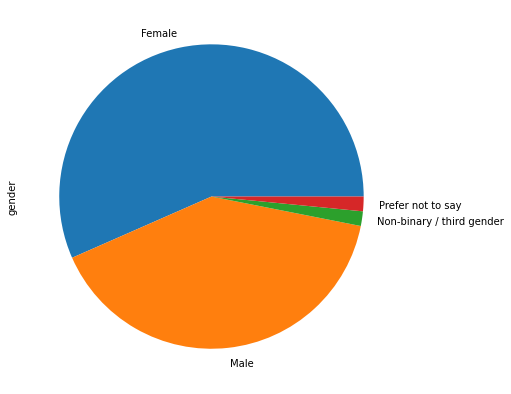

In [12]:
df['gender'].value_counts().plot(kind='pie', figsize=(7,7))

In [13]:
df['gender'].value_counts()

Female                       73
Male                         52
Non-binary / third gender     2
Prefer not to say             2
Name: gender, dtype: int64

<AxesSubplot:ylabel='school_type'>

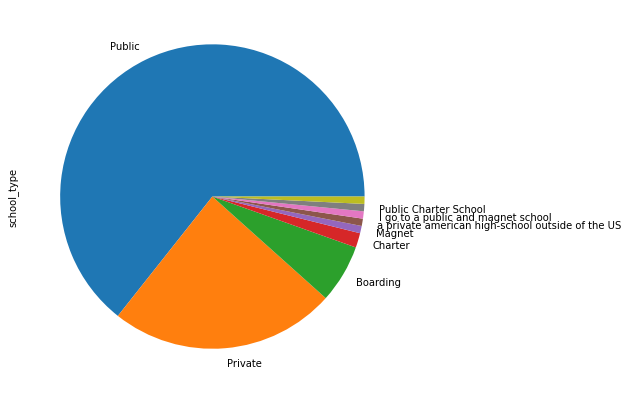

In [14]:
df['school_type'].value_counts().plot(kind='pie', figsize=(7,7))

In [15]:
df['school_type'].value_counts()

Public                                              83
Private                                             31
Boarding                                             8
Charter                                              2
Magnet                                               1
a private american high-school outside of the US     1
I go to a public and magnet school                   1
Public Charter School                                1
                                                     1
Name: school_type, dtype: int64

<AxesSubplot:>

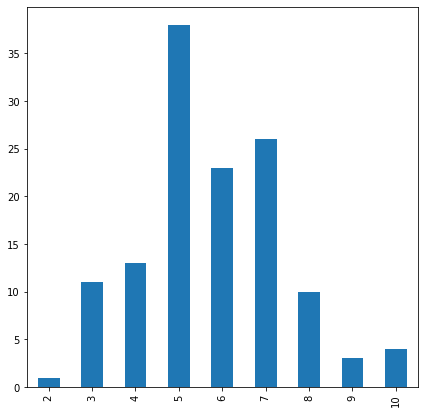

In [16]:
df['ec_involvement'].value_counts().sort_index(key=lambda x: x.astype("int")).plot(kind='bar', figsize=(7,7))

In [17]:
df['ec_involvement'].value_counts()

5     38
7     26
6     23
4     13
3     11
8     10
10     4
9      3
2      1
Name: ec_involvement, dtype: int64

In [18]:
def ec_search_by_selection(row_selection, search_list):
    row_selection_sum = row_selection.sum()
    
    for search in search_list:
        search_usage = df[row_selection]["ec_search"].str.count(search).sum()
        print(search + ": " + str(search_usage))
    print("Total: " + str(row_selection_sum))
    print("-----")
    
search_list = ["Social media", "School", "Community announcements", "Youth organizations", "Friends and family", "Google search", "I don’t know how to find extracurriculars", "Other"]

ec_search_by_selection(df["gender"] == "Female", search_list)
ec_search_by_selection(df["gender"] == "Male", search_list)
ec_search_by_selection(np.ones(df.shape[0], dtype=np.bool), search_list)

Social media: 42
School: 67
Community announcements: 17
Youth organizations: 9
Friends and family: 56
Google search: 40
I don’t know how to find extracurriculars: 5
Other: 1
Total: 73
-----
Social media: 26
School: 46
Community announcements: 13
Youth organizations: 8
Friends and family: 30
Google search: 26
I don’t know how to find extracurriculars: 4
Other: 0
Total: 52
-----
Social media: 69
School: 116
Community announcements: 30
Youth organizations: 17
Friends and family: 89
Google search: 68
I don’t know how to find extracurriculars: 9
Other: 2
Total: 129
-----


In [19]:
def sm_usage_by_selection(row_selection, sm_list):
    row_selection_sum = row_selection.sum()
    
    for sm in sm_list:
        sm_usage = df[row_selection]["sm"].str.count(sm).sum()
        print(sm + ": " + str(sm_usage))
    print("Total: " + str(row_selection_sum))
    print("-----")
    
sm_list = ["Instagram", "Facebook", "Twitter", "TikTok", "Youtube", "LinkedIn", "Snapchat", "Reddit", "Other"]

sm_usage_by_selection(df["gender"] == "Female", sm_list)
sm_usage_by_selection(df["gender"] == "Male", sm_list)
sm_usage_by_selection(np.ones(df.shape[0], dtype=np.bool), sm_list)

Instagram: 72
Facebook: 36
Twitter: 28
TikTok: 43
Youtube: 51
LinkedIn: 29
Snapchat: 56
Reddit: 3
Other: 4
Total: 73
-----
Instagram: 46
Facebook: 28
Twitter: 20
TikTok: 21
Youtube: 49
LinkedIn: 20
Snapchat: 40
Reddit: 2
Other: 3
Total: 52
-----
Instagram: 121
Facebook: 64
Twitter: 48
TikTok: 66
Youtube: 102
LinkedIn: 49
Snapchat: 97
Reddit: 6
Other: 9
Total: 129
-----


In [20]:
def sm_1_by_selection(row_selection, sm_list):
    row_selection_sum = row_selection.sum()

    for sm in sm_list:
        sm_usage = df[row_selection]["sm_most_used_1"].str.count(sm).sum()
        print(sm + ": " + str(sm_usage))
    print("Total: " + str(row_selection_sum))
    print("-----")

sm_list = ["Instagram", "Facebook", "Twitter", "TikTok", "YouTube", "LinkedIn", "Snapchat", "Reddit", "Other"]

sm_1_by_selection(df["gender"] == "Female", sm_list)
sm_1_by_selection(df["gender"] == "Male", sm_list)
sm_1_by_selection(np.ones(df.shape[0], dtype=np.bool), sm_list)

Instagram: 35
Facebook: 1
Twitter: 2
TikTok: 13
YouTube: 6
LinkedIn: 1
Snapchat: 15
Reddit: 0
Other: 0
Total: 73
-----
Instagram: 16
Facebook: 1
Twitter: 8
TikTok: 4
YouTube: 12
LinkedIn: 0
Snapchat: 10
Reddit: 1
Other: 1
Total: 52
-----
Instagram: 53
Facebook: 2
Twitter: 10
TikTok: 17
YouTube: 19
LinkedIn: 1
Snapchat: 26
Reddit: 1
Other: 1
Total: 129
-----


In [21]:
def sm_2_by_selection(row_selection, sm_list):
    row_selection_sum = row_selection.sum()

    for sm in sm_list:
        sm_usage = df[row_selection]["sm_most_used_2"].str.count(sm).sum()
        print(sm + ": " + str(sm_usage))
    print("Total: " + str(row_selection_sum))
    print("-----")

sm_list = ["Instagram", "Facebook", "Twitter", "TikTok", "YouTube", "LinkedIn", "Snapchat", "Reddit", "Other"]

sm_2_by_selection(df["gender"] == "Female", sm_list)
sm_2_by_selection(df["gender"] == "Male", sm_list)
sm_2_by_selection(np.ones(df.shape[0], dtype=np.bool), sm_list)

Instagram: 22
Facebook: 3
Twitter: 4
TikTok: 18
YouTube: 10
LinkedIn: 3
Snapchat: 12
Reddit: 1
Other: 1
Total: 73
-----
Instagram: 19
Facebook: 1
Twitter: 1
TikTok: 9
YouTube: 9
LinkedIn: 4
Snapchat: 8
Reddit: 0
Other: 1
Total: 52
-----
Instagram: 41
Facebook: 6
Twitter: 5
TikTok: 27
YouTube: 19
LinkedIn: 7
Snapchat: 21
Reddit: 2
Other: 3
Total: 129
-----


In [22]:
def sm_usage_score(row_selection, sm_list):
    row_selection_sum = row_selection.sum()
    for sm in sm_list:
        sm_platform_1 = df[row_selection]["sm_most_used_1"].str.count(sm).sum()
        sm_platform_2 = df[row_selection]["sm_most_used_2"].str.count(sm).sum()
        print(sm + ": " + str(sm_platform_1 * 1.5 + sm_platform_2))
    print("Total: " + str(row_selection_sum))
    print("-----")

sm_list = ["Instagram", "Facebook", "Twitter", "TikTok", "YouTube", "LinkedIn", "Snapchat", "Reddit", "Other"]

sm_usage_score(df["gender"] == "Female", sm_list)
sm_usage_score(df["gender"] == "Male", sm_list)
sm_usage_score(np.ones(df.shape[0], dtype=np.bool), sm_list)

Instagram: 74.5
Facebook: 4.5
Twitter: 7.0
TikTok: 37.5
YouTube: 19.0
LinkedIn: 4.5
Snapchat: 34.5
Reddit: 1.0
Other: 1.0
Total: 73
-----
Instagram: 43.0
Facebook: 2.5
Twitter: 13.0
TikTok: 15.0
YouTube: 27.0
LinkedIn: 4.0
Snapchat: 23.0
Reddit: 1.5
Other: 2.5
Total: 52
-----
Instagram: 120.5
Facebook: 9.0
Twitter: 20.0
TikTok: 52.5
YouTube: 47.5
LinkedIn: 8.5
Snapchat: 60.0
Reddit: 3.5
Other: 4.5
Total: 129
-----


In [23]:
def sm_impression_average(row_selection, sm_list):
    row_selection_sum = row_selection.sum()
    for sm in sm_list:
        sm_platform_1 = df[row_selection]["sm_most_used_1"].str.count(sm).sum()
        sm_platform_2 = df[row_selection]["sm_most_used_2"].str.count(sm).sum()
        sm_impression_1_total = df[row_selection & (df["sm_most_used_1"] == sm)]["sm_impression_1"].astype(dtype = "int64").sum()
        sm_impression_2_total = df[row_selection & (df["sm_most_used_2"] == sm)]["sm_impression_2"].astype(dtype = "int64").sum()
        print(sm + ": " + str(((sm_impression_1_total* 1.5 + sm_impression_2_total)/(sm_platform_1 * 1.5 + sm_platform_2)).round(decimals = 2)))
    print("Total: " + str(row_selection_sum))
    print("-----")

sm_list = ["Instagram", "Facebook", "Twitter", "TikTok", "YouTube", "LinkedIn", "Snapchat"]

sm_impression_average(df["gender"] == "Female", sm_list)
sm_impression_average(df["gender"] == "Male", sm_list)
sm_impression_average(np.ones(df.shape[0], dtype=np.bool), sm_list)

Instagram: 6.11
Facebook: 5.56
Twitter: 4.86
TikTok: 6.09
YouTube: 6.26
LinkedIn: 5.22
Snapchat: 5.64
Total: 73
-----
Instagram: 6.16
Facebook: 6.6
Twitter: 6.15
TikTok: 6.57
YouTube: 7.3
LinkedIn: 7.0
Snapchat: 6.02
Total: 52
-----
Instagram: 6.09
Facebook: 6.06
Twitter: 5.7
TikTok: 6.23
YouTube: 6.84
LinkedIn: 6.06
Snapchat: 5.75
Total: 129
-----


In [24]:
def ec_by_selection(row_selection, ec_list):
    row_selection_sum = row_selection.sum()
    for ec in ec_list:
        ec_interest = df[row_selection]["ec_interest"].str.count(ec).sum()
        print(ec + ": " + str(ec_interest))
    print("Total: " + str(row_selection_sum))
    print("-----")

ec_list = ["Internship", "Jobs", "Camps", "Sports", "Tutoring", "Wellness", "STEM", "Remote", "Volunteering", "Arts", "Other"]
ec_by_selection(df["gender"] == "Female", ec_list)
ec_by_selection(df["gender"] == "Male", ec_list)
ec_by_selection(np.ones(df.shape[0], dtype=np.bool), ec_list)

Internship: 55
Jobs: 49
Camps: 17
Sports: 39
Tutoring: 24
Wellness: 17
STEM: 34
Remote: 13
Volunteering: 54
Arts: 29
Other: 6
Total: 73
-----
Internship: 42
Jobs: 34
Camps: 13
Sports: 25
Tutoring: 20
Wellness: 5
STEM: 22
Remote: 9
Volunteering: 27
Arts: 14
Other: 4
Total: 52
-----
Internship: 98
Jobs: 84
Camps: 31
Sports: 65
Tutoring: 44
Wellness: 23
STEM: 60
Remote: 23
Volunteering: 83
Arts: 44
Other: 11
Total: 129
-----


In [25]:
df["wants_linked_content"].value_counts()

False    67
True     62
Name: wants_linked_content, dtype: int64

In [26]:
def ci_heatmap_avg(row_selection, group_list):
    row_selection_sum = row_selection.sum()
    avg_score = df[row_selection][group_list].mean()
    print(str(avg_score))
    print("Total: " + str(row_selection_sum))
    print("-----")

group_list = ["ci_heatmap_1_score", "ci_heatmap_2_score", "ci_heatmap_3_score", "ci_heatmap_4_score", "ci_heatmap_5_score"]
ci_heatmap_avg(df["ci"] == "1", group_list)
ci_heatmap_avg(df["ci"] == "2", group_list)
ci_heatmap_avg(df["ci"] == "3", group_list)

ci_heatmap_1_score    0.216216
ci_heatmap_2_score    0.324324
ci_heatmap_3_score    0.081081
ci_heatmap_4_score    0.108108
ci_heatmap_5_score    0.405405
dtype: float64
Total: 37
-----
ci_heatmap_1_score   -0.159091
ci_heatmap_2_score    0.159091
ci_heatmap_3_score   -0.204545
ci_heatmap_4_score    0.159091
ci_heatmap_5_score    0.340909
dtype: float64
Total: 44
-----
ci_heatmap_1_score    0.125000
ci_heatmap_2_score    0.541667
ci_heatmap_3_score    0.125000
ci_heatmap_4_score    0.208333
ci_heatmap_5_score   -0.041667
dtype: float64
Total: 48
-----


In [27]:
def si_heatmap_avg(row_selection, group_list):
    row_selection_sum = row_selection.sum()
    avg_score = df[row_selection][group_list].mean()
    print(str(avg_score))
    print("Total: " + str(row_selection_sum))
    print("-----")

group_list = ["si_heatmap_1_score", "si_heatmap_2_score", "si_heatmap_3_score", "si_heatmap_4_score", "si_heatmap_5_score", "si_heatmap_6_score"]
si_heatmap_avg(df["si"] == "1", group_list)
si_heatmap_avg(df["si"] == "2", group_list)
si_heatmap_avg(df["si"] == "3", group_list)

si_heatmap_1_score    0.122449
si_heatmap_2_score    0.224490
si_heatmap_3_score    0.571429
si_heatmap_4_score         NaN
si_heatmap_5_score         NaN
si_heatmap_6_score         NaN
dtype: float64
Total: 49
-----
si_heatmap_1_score    0.380952
si_heatmap_2_score    0.476190
si_heatmap_3_score    0.166667
si_heatmap_4_score    0.547619
si_heatmap_5_score         NaN
si_heatmap_6_score         NaN
dtype: float64
Total: 42
-----
si_heatmap_1_score    0.210526
si_heatmap_2_score    0.078947
si_heatmap_3_score    0.131579
si_heatmap_4_score    0.210526
si_heatmap_5_score    0.263158
si_heatmap_6_score    0.210526
dtype: float64
Total: 38
-----


#### Q26: CI 1, JustServe
1. Image
2. Register now
3. Side text
4. Main text
5. Logo

#### Q27: CI 2, Scholly
1. Header
2. Top text ad
3. Bottom text
4. Wesbsite
5. Logo

#### Q28: CI 3, Tallo
1. Pattern
2. Main text
3. Brand name
4. Link in bio
5. Bottom Image

#### Q35: SI 1, Mountain
1. Main text
2. Logo
3. Image

#### Q36: SI 2, Summer Tutoring
1. Top header
2. Main text
3. Bottom headline
4. Image

#### Q37: SI 3, Hockey
1. Logo
2. Top header
3. Hashtag
4. Image
5. Bottom header
6. Download today

In [28]:
def ci_matrix_avg(row_selection, group_list):
    row_selection_sum = row_selection.sum()
    avg_score = df[row_selection][group_list].mean()
    print(str(avg_score))
    print("Total: " + str(row_selection_sum))
    print("-----")

group_list = ["ci_trustworthy_score", "ci_clear_score", "ci_attractive_score", "ci_informative_score"]
ci_matrix_avg(df["ci"] == "1", group_list)
ci_matrix_avg(df["ci"] == "2", group_list)
ci_matrix_avg(df["ci"] == "3", group_list)

ci_trustworthy_score    0.400000
ci_clear_score          0.588235
ci_attractive_score     0.424242
ci_informative_score   -0.406250
dtype: float64
Total: 37
-----
ci_trustworthy_score   -0.184211
ci_clear_score          0.170732
ci_attractive_score     0.028571
ci_informative_score    0.255814
dtype: float64
Total: 44
-----
ci_trustworthy_score   -0.088889
ci_clear_score          0.875000
ci_attractive_score     0.200000
ci_informative_score    0.088889
dtype: float64
Total: 48
-----


In [29]:
def si_matrix_avg(row_selection, group_list):
    row_selection_sum = row_selection.sum()
    avg_score = df[row_selection][group_list].mean()
    print(str(avg_score))
    print("Total: " + str(row_selection_sum))
    print("-----")

group_list = ["si_trustworthy_score", "si_clear_score", "si_attractive_score", "si_informative_score"]
si_matrix_avg(df["si"] == "1", group_list)
si_matrix_avg(df["si"] == "2", group_list)
si_matrix_avg(df["si"] == "3", group_list)

si_trustworthy_score    0.408163
si_clear_score         -0.021739
si_attractive_score     1.520833
si_informative_score   -0.400000
dtype: float64
Total: 49
-----
si_trustworthy_score    0.682927
si_clear_score          0.800000
si_attractive_score     0.950000
si_informative_score    0.121951
dtype: float64
Total: 42
-----
si_trustworthy_score    0.432432
si_clear_score          0.027778
si_attractive_score     0.837838
si_informative_score   -0.194444
dtype: float64
Total: 38
-----


In [30]:
ci_feedback = df.groupby(["ci"])["ci_feedback"].apply(lambda x : "\n".join(x))
print("CI FEEDBACK, GROUP 1")
print("\n")
print(ci_feedback.at["1"])
print("\n \n \n")
print("-----")
print("CI FEEDBACK, GROUP 2")
print("\n")
print(ci_feedback.at["2"])
print("\n \n \n")
print("-----")
print("CI FEEDBACK, GROUP 3")
print("\n")
print(ci_feedback.at["3"])

CI FEEDBACK, GROUP 1


Don't like the picture, and the design could be much more interesting.
Honestly, this ad made me feel nothing. I looked at the advertisement, if I was not taking a survey, the most likely outcome is that I turned away. The "JustServe" bit at the top catches my eye. I don't understand why it needs to be one word unless "JustServe" is a service organization that I have not heard of.

The colors could be more appealing to draw me in a bit more. I think it has a good message, but it is missing the aesthetic (font, colors) it needs to appeal to teens. 

I feel it was very vague and didn’t do a great job of engaging with the audience. 
The ad has good content and catches the reader's attention. However, one thing is that there isn't much information on it so it's more ambiguous and open to interpretation (people don't know what they are registering for right off the bat and have to click another link to understand the project more). 
There is nothing wrong with the des

In [31]:
si_feedback = df.groupby(["si"])["si_feedback"].apply(lambda x : "\n".join(x))
print("SI FEEDBACK, GROUP 1")
print("\n")
print(si_feedback.at["1"])
print("\n \n \n")
print("-----")
print("SI FEEDBACK, GROUP 2")
print("\n")
print(si_feedback.at["2"])
print("\n \n \n")
print("-----")
print("SI FEEDBACK, GROUP 3")
print("\n")
print(si_feedback.at["3"])

SI FEEDBACK, GROUP 1


I really like the image they chose however , I’m not quite sure what they are advertising . 

It’s unclear what is being advertised
Very vague, seems like some kind of non profit made by a high schooler. Picture is a good stock photo but not helpful for your message. 
Only good thing is the logo. 
The blue bar on the bottom is just lame
The graphics on the bottom don't look very visually appealing. The image of the guy on the bridge, though looks nice, and makes me want to learn more about what the advertisement is for. 
I liked most of the ad because of the picturesque background, but the Spotivity symbol just looks out of place and goes into the picture itself.
The ad is visually appealing, however, like the other one it doesn't have much content so the reader doesn't have a good idea in regards to what its about. Adding more information on what spotivity is could help in making it seem more reliable. 
This ad is nice and eye catching, but the information about

In [32]:
len(df)

129

In [33]:
df.to_csv("./output.csv", index = False)